<a href="https://colab.research.google.com/github/Siddhartha-ai/AIML/blob/main/2303A51491_Lab_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset preview:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area 

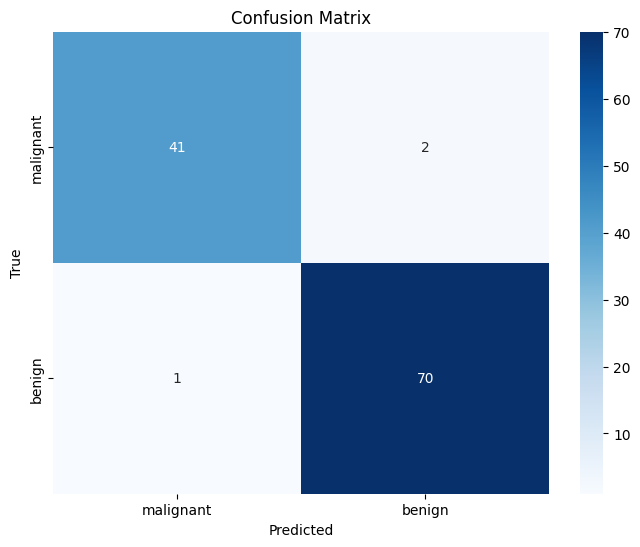

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print("Dataset preview:")
print(df.head())

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


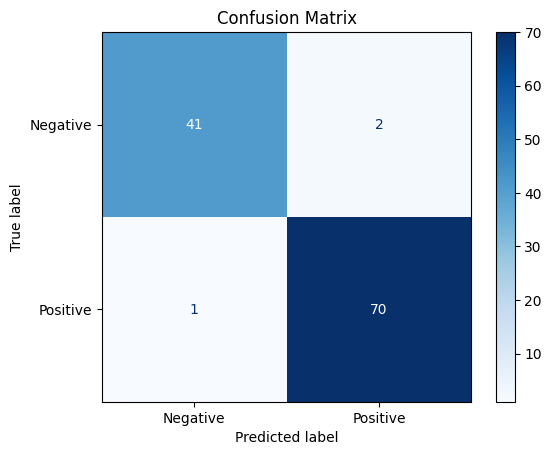

Confusion Matrix Interpretation:
True Positives (TP): 70
True Negatives (TN): 41
False Positives (FP): 2
False Negatives (FN): 1


In [2]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

tp = cm[1, 1]
tn = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]

print("Confusion Matrix Interpretation:")
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, f1_score

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, lr=0.01, epochs=1000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    for _ in range(epochs):

        linear_model = np.dot(X, weights) + bias
        y_predicted = sigmoid(linear_model)

        dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
        db = (1 / n_samples) * np.sum(y_predicted - y)

        weights -= lr * dw
        bias -= lr * db

    return weights, bias

def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_predicted = sigmoid(linear_model)
    return [1 if i > 0.5 else 0 for i in y_predicted]

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

weights, bias = logistic_regression(X_train, y_train, lr=0.01, epochs=1000)

y_pred = predict(X_test, weights, bias)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")


<ipython-input-3-dabe8d9c4c3b>:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Accuracy: 94.74%
F1-Score: 0.96


Accuracy: 69.30%
F1-Score: 0.77


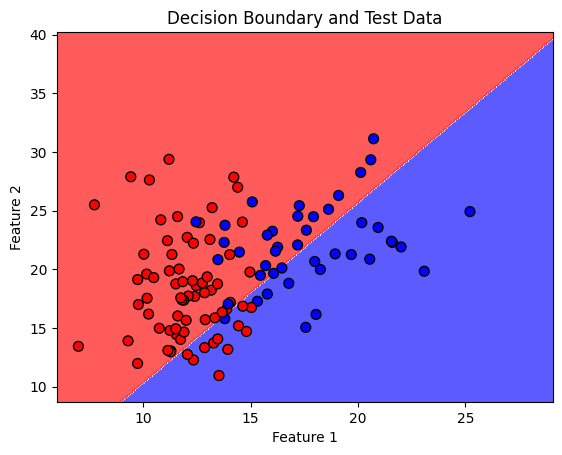

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, f1_score

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, lr=0.01, epochs=1000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    for _ in range(epochs):
        linear_model = np.dot(X, weights) + bias
        y_predicted = sigmoid(linear_model)

        dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
        db = (1 / n_samples) * np.sum(y_predicted - y)

        weights -= lr * dw
        bias -= lr * db

    return weights, bias

def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_predicted = sigmoid(linear_model)
    return [1 if i > 0.5 else 0 for i in y_predicted]

data = load_breast_cancer()
X, y = data.data[:, :2], data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

weights, bias = logistic_regression(X_train, y_train, lr=0.01, epochs=1000)

y_pred = predict(X_test, weights, bias)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = np.array([predict(np.array([[x, y]]), weights, bias)[0] for x, y in zip(np.ravel(xx), np.ravel(yy))])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bwr)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.bwr, marker='o', s=50)
plt.title('Decision Boundary and Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


Accuracy with L2 Regularization: 69.30%
F1-Score with L2 Regularization: 0.77


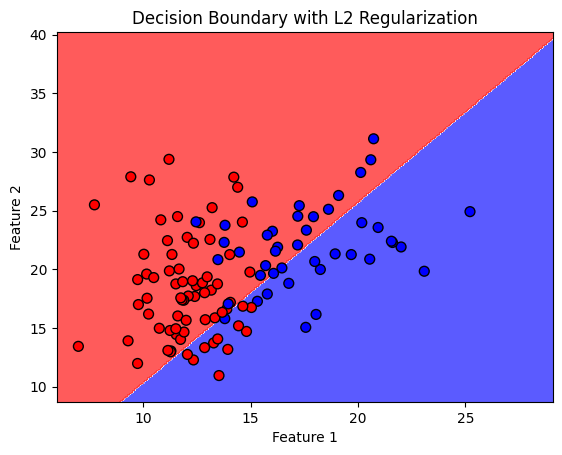

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, f1_score

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression_l2(X, y, lr=0.01, epochs=1000, lambda_reg=0.1):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    for _ in range(epochs):

        linear_model = np.dot(X, weights) + bias
        y_predicted = sigmoid(linear_model)

        dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) + (lambda_reg / n_samples) * weights
        db = (1 / n_samples) * np.sum(y_predicted - y)

        weights -= lr * dw
        bias -= lr * db

    return weights, bias

def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_predicted = sigmoid(linear_model)
    return [1 if i > 0.5 else 0 for i in y_predicted]

data = load_breast_cancer()
X, y = data.data[:, :2], data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

weights, bias = logistic_regression_l2(X_train, y_train, lr=0.01, epochs=1000, lambda_reg=0.1)

y_pred = predict(X_test, weights, bias)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with L2 Regularization: {accuracy * 100:.2f}%")

f1 = f1_score(y_test, y_pred)
print(f"F1-Score with L2 Regularization: {f1:.2f}")

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = np.array([predict(np.array([[x, y]]), weights, bias)[0] for x, y in zip(np.ravel(xx), np.ravel(yy))])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bwr)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.bwr, marker='o', s=50)
plt.title('Decision Boundary with L2 Regularization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
